#### Logistic Regression ( classification ) 

### linear regression $ y = \beta_0 + \beta_1 X$ 

## odds probability = $ \frac {p(x)}{1-p(x)} $

In [1]:
0.6 / 0.4

1.4999999999999998

In [2]:
0.4/0.6

0.6666666666666667

$$ f(x)  =  \frac {1}  {1 + e ^(-z) } $$ 

here f(x) is known as logit function which give us values between 0-1
z = $  \beta_0 + \beta_1 X$ 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
iris = sns.load_dataset('iris')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
features = iris.drop('species',axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
label_dict = { 'setosa':0,'versicolor':1,'virginica':2}

In [13]:
target = iris['species'].map(label_dict)

In [14]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.33,
                    random_state=101)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred[:5]

array([0, 0, 0, 2, 1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [22]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 20,  2],
       [ 0,  0, 13]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.96

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        22
           2       0.87      1.00      0.93        13

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



In [30]:
df = pd.DataFrame(X_test,columns=iris.columns[:-1])

In [31]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [39]:
df['color'] = pd.Series(y_test).map({0:'satosa',1:'virginica',2:'versicolor'})

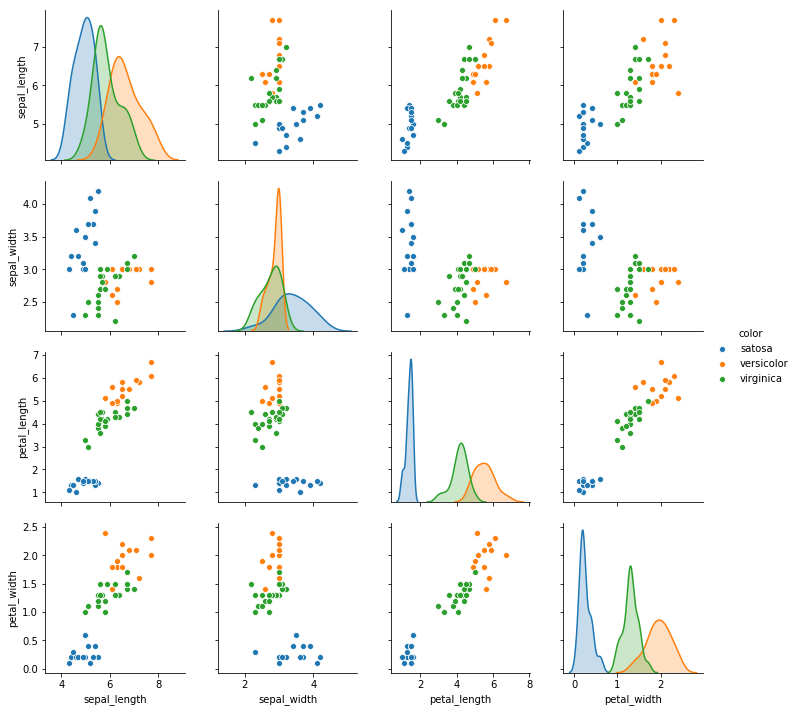

In [40]:
sns.pairplot(data=df,hue='color')

In [41]:
df['color'] = pd.Series(y_pred).map({0:'satosa',1:'virginica',2:'versicolor'})


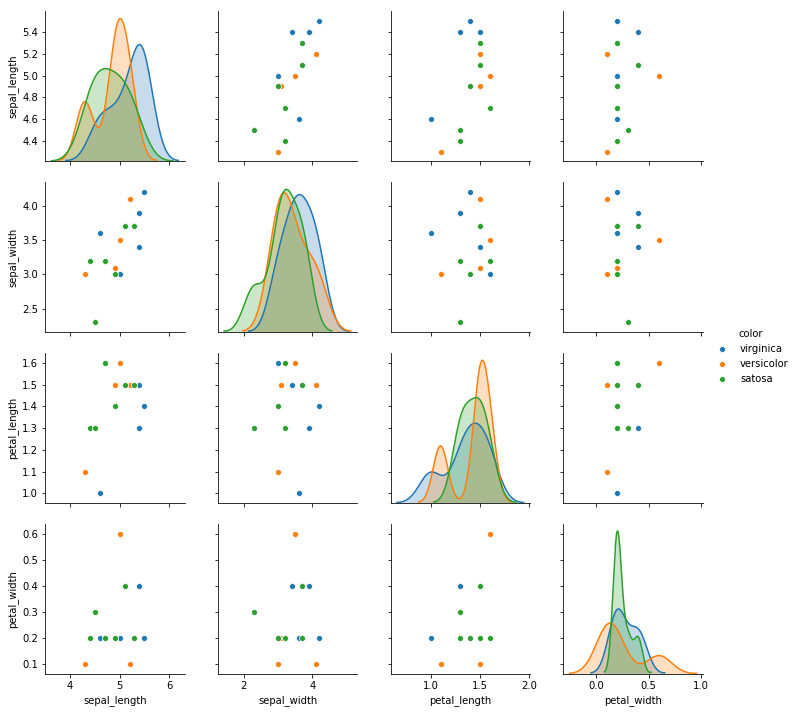

In [42]:
sns.pairplot(data=df,hue='color')